### Reinforcement learning

Istället för att förlita sig på existerande data kan ett ML system också själv samla data och lära sig utifrån detta. I äldre litteratur kallades sådana system ofta "självlärande" men den användningen har fallit ur bruk. Det typiska exemplet är en robot i en omgivning (simulerad eller verklig), men RL kan användas i alla inlärningsproblem. RL blir även allt viktigare för agentisk AI. 



Reinforcement learning går ut på att sätta någon sorts poäng på utfallet av handlingar eller val i en omgivning. Detta är förstås helt enkelt ett optimeringsvillkor, men här är vi alltså intresserade av varje enskilt steg snarare än medel, summor eller minimum. Vi väljer sedan att uppdatera systemet enligt någon _policy_, som alltså är ett steg i en optimeringsalgoritm. En sådan policy kan vara vad som helst och behöver inte nödvändigtvis vara en ML algoritm. Allt policyn gör är att välja nästa handling i omgivningen. I fallet med en agent i en simulerad eller verklig omgivning är handlingarna helt enkelt interaktioner, men i ett mer abstrakt fall kan det vara val av riktningsgradient eller något annat rent matematiskt. En särksilt intressant tillämpning, både abstrakt och konkret, är _svärmintelligens_, som vi återkommer till.


<img src="https://kitrum.com/wp-content/uploads/2023/04/Reinforcement-Learning-1024x683.png" height="320"/>


Ett återkommande problem är hur man skall hantera tidsaspekten i RL. Belöningar i dåtid eller framtid kontra omedelbart har olika relevans för olika problem. I andra metoder hanteras detta med "moment", dvs någon sorts faktor som hindrar processen att fastna i minimum. Men problemet går något djupare när inlärningen sker online -- om vi tänker oss optimeringskurvan så är det någon handling som fick oss att gå ner i ett dåligt minimum. Men vilken handling ledde oss fel?

I RL används en s.k. _discount factor_ för att lösa fetta. En faktor 1 innebär att systemet ger samma vikt till nuvarande som andra belöningar och "minns" dessa för evigt. Faktor 0 innebär att systemet ignorerar all information utom nuvarande belöning.

<img src="https://drek4537l1klr.cloudfront.net/morales/v-14/Figures/01_09.png" height="480">
<img src="../Data/credit_problems.png" height="480" widht="640" />


Det finns en uppsjö RL tekniker, ända från datorns tidiga historia (tack vare den utförliga användingen i spelande AI). Den kanske mest kända i modern tid är från Google (2014), _Deep Q Learning_ och dess varianter. Att tillämpa just den algoritmen på schack är patenterat av Google. Den är sedan länge passerad av andra shackspelande AI. Dessa metoder har ett stort minne med tidigare handlingar och deras resultat som systemet lär sig av. En viktig del av att använda Q-learning är just att välja hur en sådan _experience replay buffer_ skall initaliseras. Erfarenheter väljs slumpvis ur buffern, till skillnad från belöningsminnet (som är seriellt). För vissa problem, som till exempel schack, är det enkelt att skapa en sådan buffer, men i många fall tar agenten slumpmässiga handlingar under en längre tid i början av träningen för att utforska tillståndsrymden. Det går bra i simulation, men skulle vara förödande i verkligheten. Det är fortfarande tidsödande och beräkningsmässigt dyrt. Andra, som den mer moderna PPO, är istället en _policy gradient_ metod, som lär sig helt online. 

RL system i allmänhet "skapar sin egen träninsgdata" live i sin omgivning. Detta innebär tyvärr att de är mycket känsliga för alla problem som annan ML har-- instabilitet under träning, känslighet för initialtillstånd och en särskild tendens att hamna i dåliga optimeringsloopar. Dessutom är de mycket mer känsliga för hyperparametrar. Det är värt att minnas att biologiska system spenderar mer resurser på _hämmning_ än på aktivering, så detta är förmodligen inte en brist i våra träningsalgoritmer eller nätverksdesign, utan ett verkligt förhållande. Realtidsinlärning är en kaotisk och parallell aktivitet där betydande resurser måste användas för att linjärisera gradienterna. Vi använder uttryck som "reda ut", "få ordning på" och så vidare när det gäller våran egen inlärning och erfarenheter, så i den lite lösa _duck-typing_ paradigmen vi använder i ML finns gott stöd för liknelsen.

In [130]:
import matplotlib.pyplot as plt
import gymnasium as gym
max_episode_steps = 1000
env = gym.make("CartPole-v1", render_mode="human", max_episode_steps=max_episode_steps)

OpenAI Gymnasium har klassiska kontrollproblem, spel och simulationer. Genom tillägg finns en uppsjö mer moduler, till exempel hela katalogen av Atari 2600 spel i en förberedd emulator.

Gym tillhandahåller en stegbar miljö där varje steg ger tillbaka en ett nytt tillstånd i simulationen. Tillståndet defineras av problemet, men innehåller en observation, ett värde som anger utfallet av tidigare handling (definerat av problemet) och några tillståndsvariabler med information om problemet anses misslyckat, spelet tagit slut eller simlulationen avslutats och så vidare.

I vissa fall är observationen en enkel vektor, som i CartPole exemplet -- ett klassiskt kontrollproblem som går ut på att balansera en pinne. Att flytta vagnen höger eller vänster är enda möjliga handlingarna. I andra fall är observationen en bild av ett spel, till exempel Pacman, eller något komplext tillstånd som i HumanoidStandup 

<img src="https://gymnasium.farama.org/_images/humanoid.png" />

In [131]:
gym.pprint_registry()

===== classic_control =====
Acrobot-v1             CartPole-v0            CartPole-v1
MountainCar-v0         MountainCarContinuous-v0 Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0     phys2d/CartPole-v1     phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3       BipedalWalkerHardcore-v3 CarRacing-v3
LunarLander-v3         LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1           CliffWalking-v1        CliffWalkingSlippery-v1
FrozenLake-v1          FrozenLake8x8-v1       Taxi-v3
===== tabular =====
tabular/Blackjack-v0   tabular/CliffWalking-v0
===== None =====
Ant-v2                 Ant-v3                 GymV21Environment-v0
GymV26Environment-v0   HalfCheetah-v2         HalfCheetah-v3
Hopper-v2              Hopper-v3              Humanoid-v2
Humanoid-v3            HumanoidStandup-v2     InvertedDoublePendulum-v2
InvertedPendulum-v2    Pusher-v2              Reacher-v2
Swimmer-v2             Swimmer-v3             Walker2d-v2
Walker2d-v3
===== mujoco =====
Ant-v4    

Vi börjar med att sätta en godtycklig policy för CartPole simulationen, i varje steg vänder vi helt enkelt på riktningen.

För att återställa en simulation till början använder vi <code>reset()</code>.

In [132]:
env.reset()
a = 0
done = 0
while (not done or not trunc):
    a = not a
    obs, reward, done, trunc, info = env.step(a)

/home/raphael/code/.venv/lib64/python3.14/site-packages/gymnasium/envs/classic_control/cartpole.py:214: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


Som synes av varnigen så har problemet redan misslyckats, men vi fortsätter tills _truncated_ blir sann. I detta fall är det "max_episode_steps" som slår till tack vare att vi skickade med den parametern i konstruktorn till <code>env</code>, men som varningen informerar oss om så är det _odefinierat_ vad som händer i allmänhet. För att stänga det öppna fönstret måste vi kalla på <code>close()</code>. Om vi tvingar ner programmet kraschar hela jupyter!

In [133]:
env.close()

Om vi inte vill se agenten spela i mänsklig takt, utan vill låta datorn spela så fort som möjligt kan vi dirigera om renderingen från "human" till bara en bild.

In [134]:
env = gym.make("CartPole-v1", render_mode="rgb_array", max_episode_steps=max_episode_steps)

Reset ger oss en initial observation och en info variabel (tom för CartPole problemet).

In [135]:
obs, info = env.reset(seed=42)
obs, info

(array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32),
 {})

Observationen i detta fall (från dokumentationen):

Cart Position

Cart Velocity

Pole Angle

Pole Angular Velocity

Om vi vill plocka ut en bild kan vi anropa <code>render()</code>.

In [136]:
img = env.render()
img.shape

(400, 600, 3)

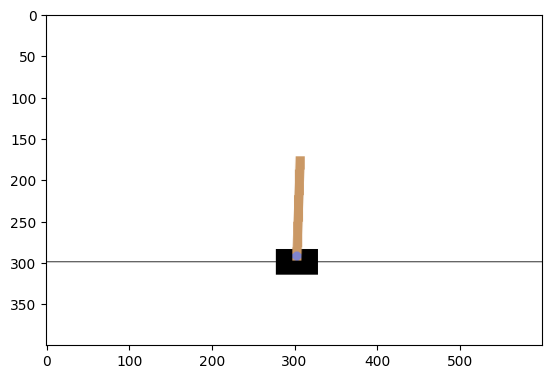

In [137]:

plt.imshow(img)

Som sagt finns bara höger och vänster i problemets <em>action space</em>.

In [138]:
env.action_space # 0 - vänster, 1 - höger

Discrete(2)

Låt oss pröva en lite smartare policy:

In [139]:
def basic_policy(obs):
    angle = obs[2]
    if angle < 0:
        return 0
    else:
        return 1

In [140]:
env = gym.make("CartPole-v1", render_mode="human", max_episode_steps=max_episode_steps)
totals = []
for episode in range(10):
    total_rewards = 0
    obs, info = env.reset(seed=episode)
    trunc, done = False, False
    while (not done and not trunc):
        action = basic_policy(obs)
        obs, reward, done, trunc, info = env.step(action)                     
        total_rewards += reward        
    totals.append(total_rewards)
env.close()

Som synes är problemet definerat sådant att pinnen måste vara inom en viss vinkel innan den anses ha fallit.

In [141]:
import numpy as np
np.mean(totals), np.std(totals), min(totals), max(totals)

(np.float64(38.6), np.float64(7.472616676907761), 25.0, 51.0)

Låt oss använda ett neuralt nätverk som policy! På så sätt kan vi istället lära oss vilka inputs som är bäst för att hålla balansen.

In [142]:
import torch
import torch.nn as nn

class PolicyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Linear(4,5), nn.ReLU(), nn.Linear(5,1))

    def forward(self, state):
        return self.net(state)

Vi expanderar till fem features, alltså ökar vi vår <em>latent space</em> med en dimension över <em>feature space</em>. Med ReLU mellan lagrena borde vi kunna lära oss icke-linjära interaktionseffekter mellan observationerna. Indata är fyra rella tal och utdata är ett reellt tal. Vi tolkar utdatan som en <em>logit</em> (även log-odds), alltså en sannolikhet spridd över hela $\mathbb{R}$ $(-\infty, +\infty)$ istället för $[0,1]$. 

Vi skapar sedan en Bernoulli-fördelning med den just logit spridningen. Minns att Bernoulli är en två-punkts fördelning, alltså i detta fall valet mellan höger och vänster. Sedan drar vi ett värde ur denna fördelning och ger tillbaka värdet (höger eller vänster) och hur sannolikt det var att vi drog just det värdet givet vår policy.

Detta innebär att det alltid finns en chans att vi istället väljer den motsatta riktiningen istället för den nätverket tror är bäst. Litteraturen kring RL föreskriver att ett visst slumpmässigt beteende skall bevaras för att agenten skall kunna fortsätta utforska lösningsrymden och anpassa sig till förändringar. 

Den metod vi implementerar kallas _Monte Carlo Policy Gradient_.

In [143]:
def choose_action(model, obs):
    state = torch.as_tensor(obs)
    logit = model(state)
    dist = torch.distributions.Bernoulli(logits=logit)
    action = dist.sample()
    log_prob = dist.log_prob(action)
    return int(action.item()), log_prob

Ok! Men hur tränar vi nätverket?


För att träna detta nätverk kör vi helt enkelt en episod med nuvarande policy, beräknar i efterhand vad de faktiska belöningarna med en discount factor på _framtida_ handlingar borde varit och uppdaterar vårt policy-nätverk med gradient descent på loss-funktionen (se nedan).

In [144]:
def compute_returns(rewards, discount_factor):
    returns = rewards[:]
    for step in range(len(returns) - 1, 0, -1):
        returns[step-1] += returns[step] * discount_factor
    return torch.tensor(returns)

In [145]:
def run_episode(model, env, seed=None):    
    log_probs, rewards = [], []
    obs, info = env.reset(seed=seed)
    while True:
        action, log_prob = choose_action(model, obs)
        obs, reward, done, trunc, _ = env.step(action)
        log_probs.append(log_prob)
        rewards.append(reward)
        if done or trunc:
            return log_probs, rewards
    

Loss-funktionen förtjänar en kommentar. 

\begin{equation*}
-\sum{\ln(p_x)*\frac{x-\bar{x}}{\sigma}}
\end{equation*}



Log-prob representerar sannolikheter som $(-\infty, 0]$. Termen till höger är standardpoängen ($z$) för den justerade belöningen $x$. Standardisering rekommenderas för denna metod, men är inte strikt nödvändig. Bara $x$ går bra, men träningen blir mindre stabil. Variabeln $p_x$ är nätverkets uppskattade sannolikhet för handlingen som leder till belöningen $x$.

Detta är ganska likt maximum likelihood metoden! Genom att minimera denna funktion, maximerar vi de justerade belöningarna. Strikt sett maximerar vi sannolikheten att vi väljer handlingar som tidigare lett till bra justerade belöningar. 

Vi väljer ett stoppvillkor som säger att när ett nätverk klarat balanseringsakten tre gånger i rad så är det tillräckligt bra. I online inlärning är detta ett svårt problem. Vi måste hålla reda på en sorts bästa modell men också veta när det är dags att byta modell. RL är fasansfullt instabilt utan hämmningssystem!

In [146]:
def train_reinforce(model, optimizer, env, n_episodes, discount_factor):
    model.train()
    early_stop = list()
    for episode in range(n_episodes):
        seed = torch.randint(0, 2**32, size=()).item()
        log_probs, rewards = run_episode(model, env, seed=seed)
        returns = compute_returns(rewards, discount_factor)
        std_returns = (returns - returns.mean()) / (returns.std() + 1e-7) # numeriskt trick för att undvika /0
        losses = [-logp * rt for logp, rt in zip(log_probs, std_returns)]        
        loss = torch.cat(losses).sum()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        s = sum(rewards)
        early_stop += [s]
        print(f"\rEpisode {episode + 1}, Reward: {s:.2f}", end=" ")
        if all(map(lambda x: x == 1000, early_stop[-3:])):
            break


In [147]:
env = gym.make("CartPole-v1", render_mode="rgb_array", max_episode_steps=max_episode_steps)
model = PolicyNetwork()
optimizer = torch.optim.NAdam(model.parameters(), lr=0.06) # Nesterov moment ADAM, konvergerar snabbare (viktigt för online inlärning)
train_reinforce(model, optimizer, env, n_episodes=1000, discount_factor=.95)

Episode 148, Reward: 1000.00 

In [148]:
def show_one_episode(policy, model, seed=42):
    model.eval()
    frames = []
    env = gym.make("CartPole-v1", render_mode="human",
                   max_episode_steps=1000)
    obs, info = env.reset(seed=seed)
    rewards = []
    while True:
        action = policy(obs, model)
        obs, reward, done, truncated, info = env.step(action)        
        rewards.append(reward)
        if done or truncated:
            print(f"Failed: {done}")
            break
    env.close()
    return sum(rewards)

def neural_net_policy(obs, model):
    with torch.no_grad():
        action, _ = choose_action(model, obs)
        return action


In [149]:
show_one_episode(neural_net_policy, model, seed=None)

Failed: False


1000.0